In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
bikes = pd.read_pickle('BikeDataImp.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [4]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

bikes_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)
bikes_weeks.head()

,Rental Count,Temperature,Humidity,Wind speed
week,,,,
1,39441,-2.694940,43.660714,1.524405
2,30871,-5.079762,53.958333,1.995833
3,42193,2.662500,55.178571,1.385119
4,23079,-10.038690,38.410714,2.575000
5,28415,-5.650595,47.815476,2.256548


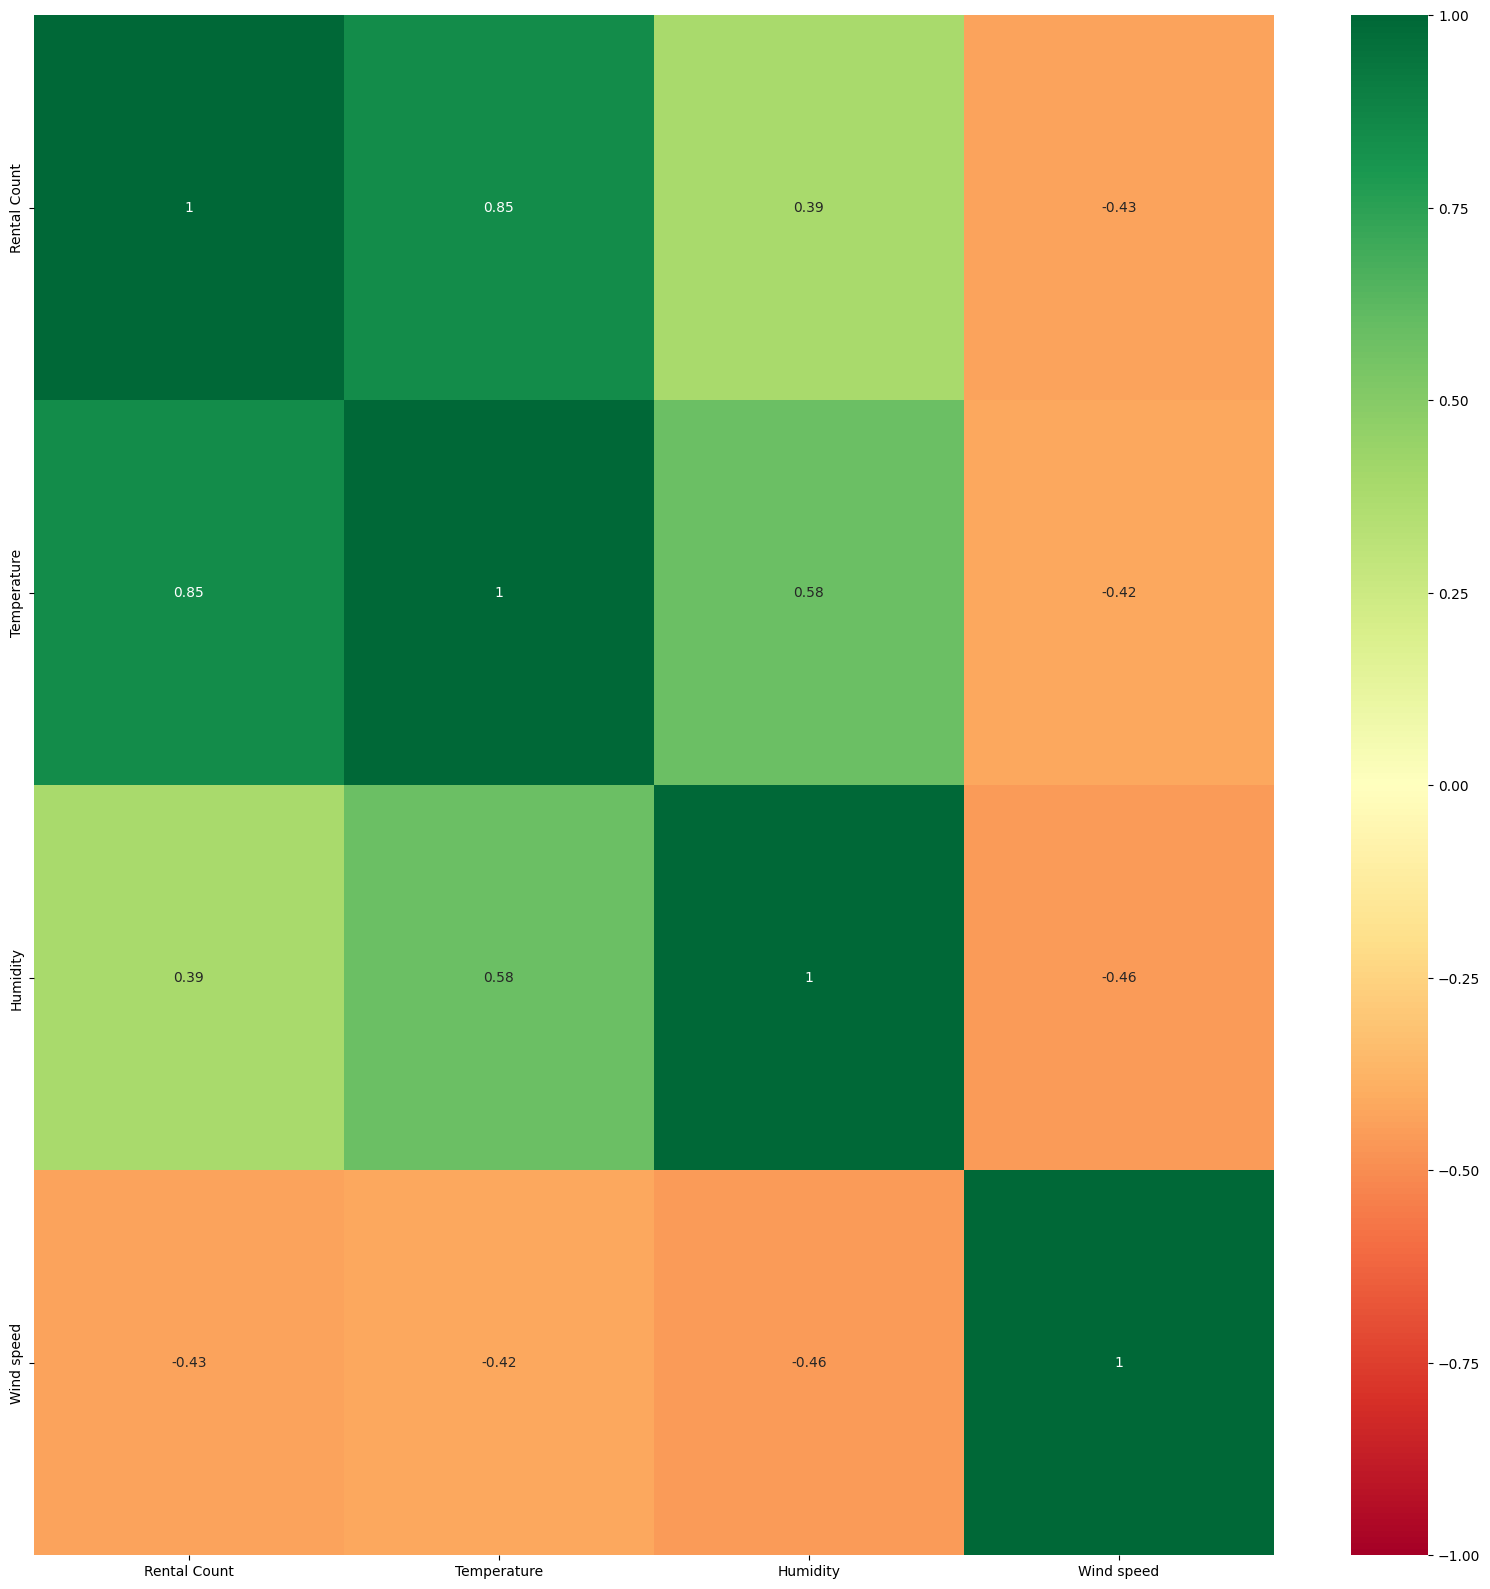

In [6]:
plt.figure(figsize=(20,20))
p = sns.heatmap(bikes_weeks.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

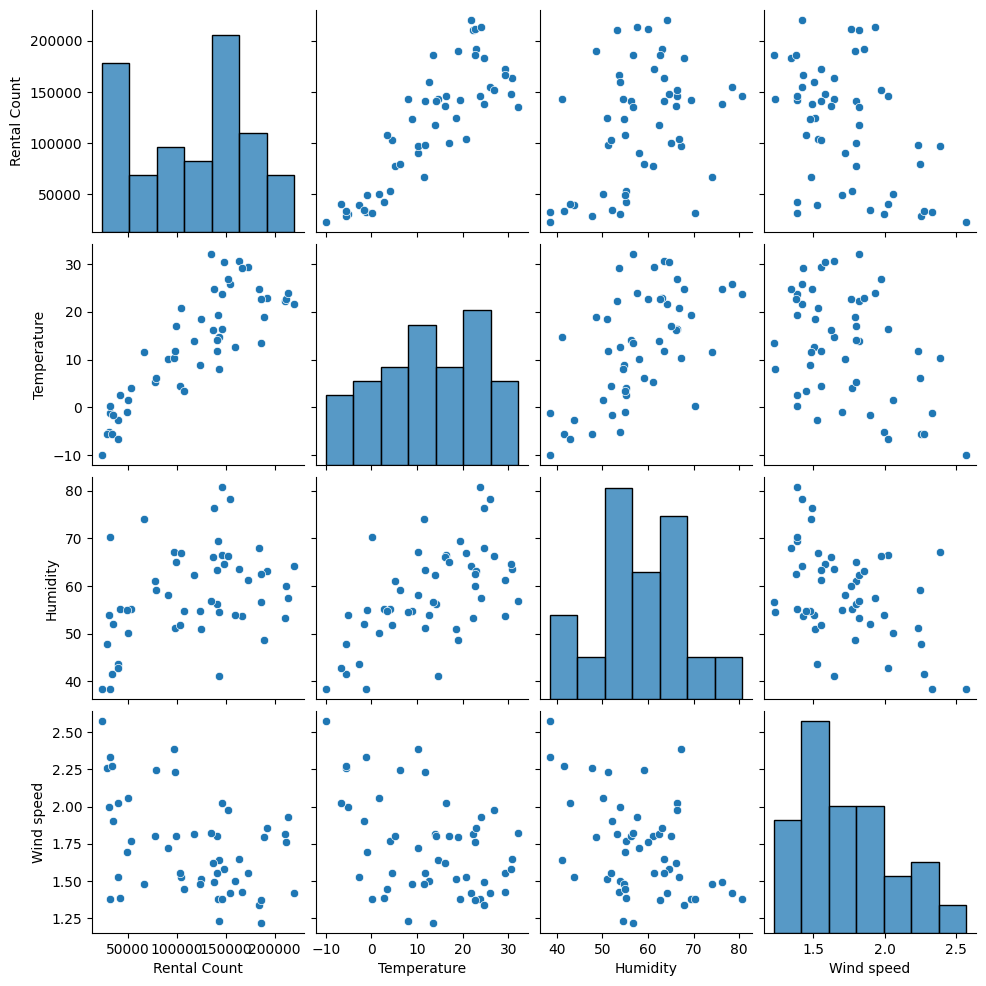

In [7]:
sns.pairplot(bikes_weeks)

In [8]:
X = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=4309.320603391841, intercept=61741.699243285024, rvalue=0.8458075200534889, pvalue=2.992184317240584e-15, stderr=384.39441030665824, intercept_stderr=6596.057490467339)


In [10]:
r_sq = res.rvalue ** 2
print(r_sq)

0.7153903609790331


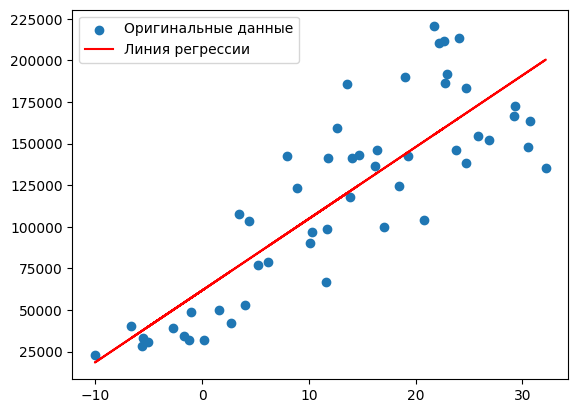

In [11]:
plt.scatter(X, y, label = "Оригинальные данные")
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'Линия регрессии')
plt.legend()
plt.show()

In [14]:
X_simple = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']
X_simple_constant = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.99e-15
Time:                        19:28:15   Log-Likelihood:                -611.13
No. Observations:                  52   AIC:                             1226.
Df Residuals:                      50   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.174e+04   6596.057      9.360      

In [17]:
X_mult = bikes_weeks.drop('Rental Count', axis=1)
X_mult.head()

,Temperature,Humidity,Wind speed
week,,,
1,-2.694940,43.660714,1.524405
2,-5.079762,53.958333,1.995833
3,2.662500,55.178571,1.385119
4,-10.038690,38.410714,2.575000
5,-5.650595,47.815476,2.256548


In [18]:
X_mult = sm.add_constant(bikes_weeks.drop('Rental Count', axis=1))

In [20]:
model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.99e-14
Time:                        19:33:28   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      